In [1]:
# function for calculating accuracy - simple.
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy.
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true and y_pred 'together'
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1

    # return accuracy
    return correct_counter / len(y_true)

In [5]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """ 
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """ 
    Function to calculate false positives
    :param y_true: list of true values
    :param y_pred: list of predictions
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """ 
    Function to calculate False negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # intiitalize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [3]:
%%markdown
#### The functions implemented above only works for binary classification

#### The functions implemented above only works for binary classification


In [6]:
def accuracy_v2(y_true, y_pred):
    """ 
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score
    

In [9]:
# cross check the functions against the metrics in scikit-learn.
from sklearn import metrics
import numpy as np

l1 = np.array([0,1,1,1,0,0,0,1])
l2 = np.array([0,1,0,1,0,1,0,0])

assert accuracy(l1, l2) == accuracy_v2(l1, l2) == metrics.accuracy_score(l1, l2)

In [10]:
# precision = tp / (tp + fp)
def precision(y_true, y_pred):
    """ 
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision_score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [11]:
# recall = tp / (tp + fn)
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [12]:
# F1 = 2PR / (P + R) = 2TP / (2TP + FP + FN)
def f1(y_true, y_pred):
    """ 
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    f1_score = 2 * p * r / (p + r)
    return f1_score

In [13]:
%%markdown
True Positive Rate (TPR) is the same as recall. It is also called sensitivity.

True Positive Rate (TPR) is the same as recall. It is also called sensitivity.


In [18]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)

In [19]:
# False positive rate (fpr) = fp / (tn + fp)
def fpr(y_true, y_pred):
    """ 
    Function to calculate fpr
    :param y_true: list of true values
    :param y_pred: list of predicted values
    return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)


In [20]:
%%markdown
True Negative Rate (TNR) or Spcificity is 1 - FNR.

True Negative Rate (TNR) or Spcificity is 1 - FNR.


In [21]:
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 
        0, 0, 1, 0, 1, 0, 0, 1]
    
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
        0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
        0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
            0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predicitons for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

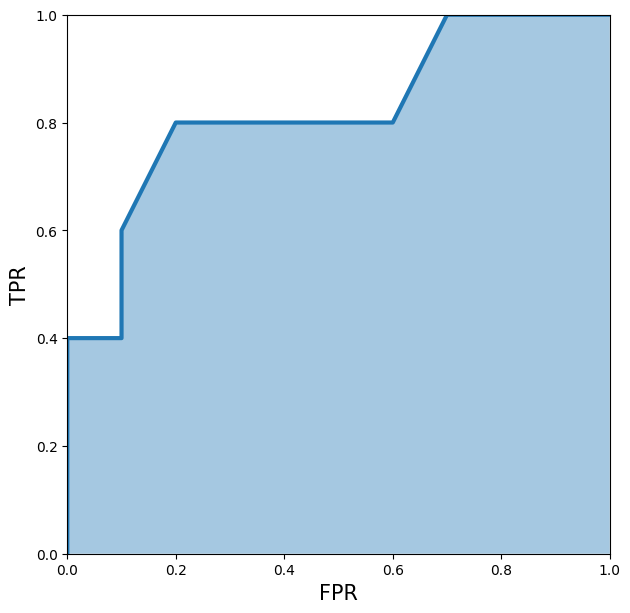

In [22]:
# plotting the tables for the fpr and tpr to get the ROC curve.
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [24]:
%%markdown
### Area Under the Curve (AUC)

### Area Under the Curve (AUC)


In [25]:
from sklearn import metrics

auc_score = metrics.roc_auc_score(y_true, y_pred)
print(auc_score)

0.8300000000000001


In [27]:
%%markdown

AUC values range from 0 to 1.

#### What does it mean?

If you get an AUC of 0.85 when you build a model to detect class 1. If you select a random instance from your dataset with class 1 and another random instance of not class 1, 
the the class 1 image will rank higher than a non-class 1 with a probability of 0.85.


AUC values range from 0 to 1.

#### What does it mean?

If you get an AUC of 0.85 when you build a model to detect class 1. If you select a random instance from your dataset with class 1 and another random instance of not class 1, 
the the class 1 image will rank higher than a non-class 1 with a probability of 0.85.


In [29]:
%%markdown

The ROC curve can be used to select the desired threshold to apply for binary classification tasks. Minimizing false positives means you have a high threshold,
while minimising false negatives might mean you have a lower threshold.

##### In the figure above, the top most left point of the ROC curve gives a suitable threshold to use


The ROC curve can be used to select the desired threshold to apply for binary classification tasks. Minimizing false positives means you have a high threshold,
while minimising false negatives might mean you have a lower threshold.

##### In the figure above, the top most left point of the ROC curve gives a suitable threshold to use


In [30]:
%%markdown

### Log Loss


### Log Loss


In [31]:
import numpy as np

def log_loss(y_true, y_proba):
    """ 
    Function to calculate log loss
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define the epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    # initialize empy list to store
    # individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability, 0 gets converted to 1e-15 1 gets converted to 1 - 1e-15. 
        yp = np.clip(yp, epsilon, 1-epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (
            yt * np.log(yp)
            + (1 - yt) * np.log(1 - yp)
        )
        # add to loss list
        loss.append(temp_loss)
    # return mean loss over all samples
    return np.mean(loss)

In [32]:
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

log_loss(y_true, y_proba=y_proba)

0.49882711861432294

In [33]:
from sklearn import metrics

metrics.log_loss(y_true=y_true, y_pred=y_proba)

0.49882711861432294

In [35]:
%%markdown

### Multi-class Classification with Precision

- Macro averaged precision: calculate precision for all classes individually and then average them.

- Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision.

- Weighted precision: same as macro but in this case, it is weighted average depending on the number of items in each class.


### Multi-class Classification with Precision

- Macro averaged precision: calculate precision for all classes individually and then average them.

- Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision.

- Weighted precision: same as macro but in this case, it is weighted average depending on the number of items in each class.


In [36]:
import numpy as np

def macro_precision(y_true, y_pred):
    """ 
    Function to calcualte macro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: macro precision score
    """

    # find the number of classes by taking length of unique values in true list.
    num_classes = len(np.unique(y_true))

    # initialize precision to 0
    precision = 0

    # loop over all classes
    for class_ in range(num_classes):

        # all clases except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate tru positive for current class
        tp = true_positive(temp_true, temp_pred)

        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)

        # calculate precision for current class
        temp_precision = tp / (tp + fp)

        # keep adding precision for all classes
        precision += temp_precision

    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

In [37]:
import numpy as np 

def micro_precision(y_true, y_pred):
    """ 
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    : return: micro precision score
    """

    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))

    # initialize tp and fp to 0
    tp = 0
    fp = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate true positvie for current class and update overall tp
        tp += true_positive(temp_true, temp_pred)

        # calcualte false postivie for current class and update overall tp
        fp += false_positive(temp_true, temp_pred)

    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [43]:
from collections import Counter
import numpy as np

def weighted_precision(y_true, y_pred):
    """ 
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """

    # find the number of classes by taking length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary it looks something like this: {0: 20, 1:15, 2: 21}
    class_counts = Counter(y_true)
    # initialize precision to 0
    precision = 0

    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # claculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        # calcualte precision of class
        temp_precision = tp / (tp + fp)
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        # add to overall precision
        precision += weighted_precision
    
    # calculate overall precision by dividing by total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

In [44]:
%%markdown

#### Compare with Scikit-learn


#### Compare with Scikit-learn


In [45]:
from sklearn import metrics

y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]

assert macro_precision(y_true, y_pred) == metrics.precision_score(y_true, y_pred, average="macro")
assert micro_precision(y_true, y_pred) == metrics.precision_score(y_true, y_pred, average="micro")
assert weighted_precision(y_true, y_pred) == metrics.precision_score(y_true, y_pred, average='weighted')

In [47]:
from collections import Counter
import numpy as np

def weighted_f1(y_true, y_pred):
    """ 
    Function to calculate weighted f1 score
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted f1 score
    """

    # find the number of classes by taking length of uniquye values in true list
    num_classes = len(np.unique(y_true))
    # create class: sample count dictionary it looks something like {0: 20, 1:15, 2:25}
    class_counts = Counter(y_true)
    # initialize f1 to 0
    f1 = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0

        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        # add to f1 precision
        f1 += weighted_f1
        
    # calculate overall F1 by dividing by total number of samples
    overall_f1 = f1 / len(y_true)
    return overall_f1

In [48]:
from sklearn import metrics

y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]

assert weighted_f1(y_true, y_pred) == metrics.f1_score(y_true, y_pred, average="weighted")

In [49]:
%%markdown

##### Multi-class Confusion Matrix: A perfect confusion matrix should only be filled diagonally form left to right.


##### Multi-class Confusion Matrix: A perfect confusion matrix should only be filled diagonally form left to right.


Text(0.5, 55.249999999999986, 'Predicted Labels')

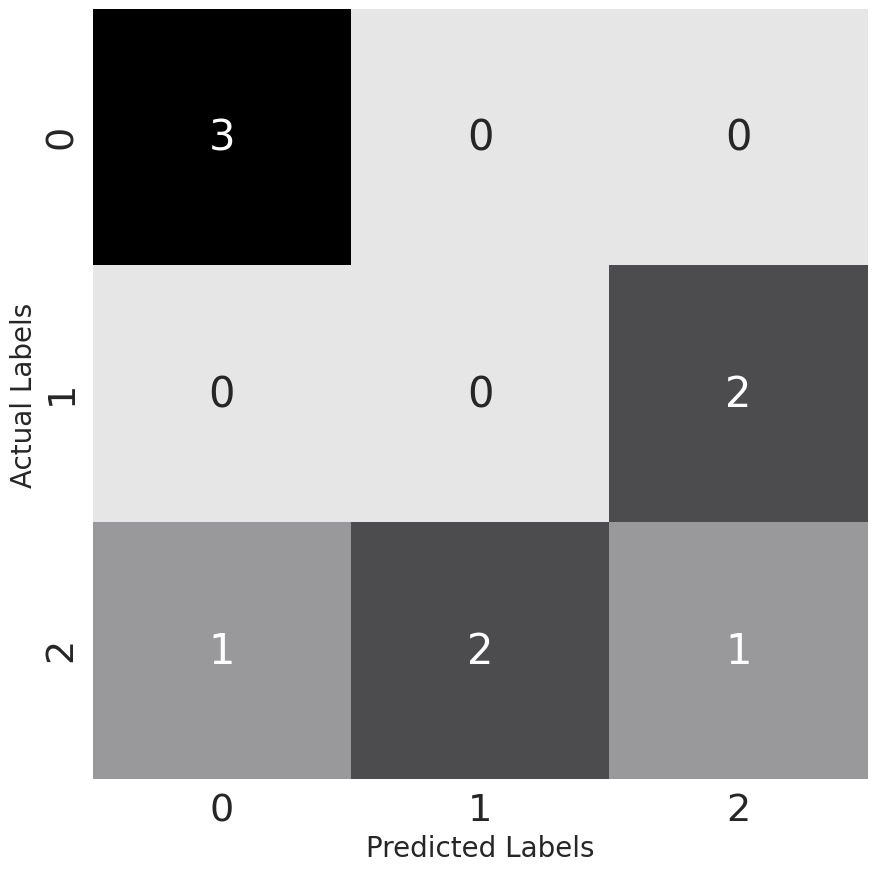

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [0,1,2,0,1,2,0,2,2]
# some predictions
y_pred = [0,2,1,0,2,1,0,0,2]
# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

## Multi-label Classification Metrics

In [71]:
### Precision at k or P@k
def pk(y_true, y_pred, k):
    """
    This function calculates precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :param k: the value for k
    :return: precision at a given value k
    """
    # if k is 0, return 0. We should never have this as k is always >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    # convert predictions to set
    pred_set = set(y_pred)
    # convert actual values to set
    true_set = set(y_true)
    # find common values
    common_values = pred_set.intersection(true_set)
    # return length of common values over k
    return len(common_values) / len(y_pred[:k])

In [72]:
def apk(y_true, y_pred, k):
    """ 
    This function calculates average precision at k for a single sample
    :param y_true; list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: average precision at a given value k
    """
    # initialize p@k list of values
    pk_values = []
    # loop over all k, from 1 to k+1
    for i in range(1, k + 1):
        # calculate p@1 and append to list
        pk_values.append(pk(y_true, y_pred, i))

    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

In [73]:
y_true = [
    [1,2,3],
    [0,2],
    [1],
    [2,3],
    [1,0],
    []
]

y_pred = [
    [0,1,2],
    [1],
    [0,2,3],
    [2,3,4,0],
    [0,1,2],
    [0]
]

In [74]:
for i in range(len(y_true)):
    for j in range(1,4):
        print(
            f""" 
            y_true={y_true[i]},
            y_pred={y_pred[i]},
            AP@{j}={apk(y_true[i], y_pred[i], k=j)}
            """
        )

 
            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@1=0.0
            
 
            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@2=0.25
            
 
            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@3=0.38888888888888884
            
 
            y_true=[0, 2],
            y_pred=[1],
            AP@1=0.0
            
 
            y_true=[0, 2],
            y_pred=[1],
            AP@2=0.0
            
 
            y_true=[0, 2],
            y_pred=[1],
            AP@3=0.0
            
 
            y_true=[1],
            y_pred=[0, 2, 3],
            AP@1=0.0
            
 
            y_true=[1],
            y_pred=[0, 2, 3],
            AP@2=0.0
            
 
            y_true=[1],
            y_pred=[0, 2, 3],
            AP@3=0.0
            
 
            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
            AP@1=1.0
            
 
            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
      

In [75]:
# mean average precision at k or MAP@k
def mapk(y_true, y_pred, k):
    """ 
    This function calculates mean avg precision at k for a single sample
    :param y_true: list of values, actual classes
    :param y_pred: list of values, predicted classes
    :return: mean avg precision at a given value k
    """
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(
            apk(y_true[i], y_pred[i], k=k)
        )
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

In [76]:
y_true = [
    [1,2,3],
    [0,2],
    [1],
    [2,3],
    [1,0],
    []
]

y_pred = [
    [0,1,2],
    [1],
    [0,2,3],
    [2,3,4,0],
    [0,1,2],
    [0]
]

In [79]:
print(mapk(y_true, y_pred, k=1))

print(mapk(y_true, y_pred, k=2))

print(mapk(y_true, y_pred, k=3))

print(mapk(y_true, y_pred, k=4))

0.3333333333333333
0.375
0.3611111111111111
0.34722222222222215


In [80]:
# taken from: 
# https://github.com/benhamner/Metrics/blob/
# master/Python/ml_metrics/average_precision.py

import numpy as np 

def apk(actual, predicted, k=10):
    """ 
    Computes the average precision at k.
    This function computes the AP at k between two lists of items.
    Parameters
    ----------
    actual: list
            A list of elements to be predicted (order doesn't matter)
    predicted: list
            A list of predicted elements (order does matter)
    k : int, optional
            The maximum number of predicted elements
    Returns
    --------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    
    if not actual:
        return 0.0

    return score / min(len(actual), k)

In [83]:
%%markdown
## Regression Metrics

## Regression Metrics


##### Mean Absolute Error (MSE)

In [84]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    """ 
    this function calculates mae
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absoute error
    """
    # initalize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate absolute error and add to error
        error += np.abs(yt - yp)
    # return mean error
    return error / len(y_true)

In [85]:
def mean_squared_error(y_true, y_pred):
    """ 
    This function calculates mse
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared error
    """
    # initialize error at 0
    error = 0
    # loop over all samples inthe true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calcualte squared error and add to error
        error += (yt - yp) ** 2
    # return mean error
    return error / len(y_true)

In [86]:
# mean square logarithmic error
def mean_squared_log_error(y_true, y_pred):
    """ 
    This function calculates msle
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared logarithmic error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error and add to error
        error += (np.log(1 + yt) - np.log(1 + yp)) ** 2
    # return mean error
    return error / len(y_true)

In [87]:
def mean_percentage_error(y_true, y_pred):
    """ 
    This function calculates mpe
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean percentage error
    """
    # initialize error at 0
    error = 0

    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error and add to error
        error += (yt - yp) / yt
    
    # return mean percentage error
    return error / len(y_true)

In [88]:
# Mean absolute percentage error or MAPE

def mean_abs_percentage_error(y_true, y_pred):
    """ 
    This function calculates MAPE
    :param y_true; list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute percentage error
    """
    # initialize error at 0
    error = 0
    # loop over all samples in true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error and add to error
        error += np.abs(yt - yp) / yt 
    # return mean percentage error
    return error / len(y_true)

In [90]:
# implementing R2
import numpy as np 

def r2(y_true, y_pred):
    """ 
    This function calculates r-squared score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: r2 score
    """

    # calculate the mean value of true values
    mean_true_value = np.mean(y_true)

    # initialize numerator with 0
    numerator = 0
    # initalize denominator with 0
    denominator = 0

    # loop over all true and predicted values
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
    # calcualte the ratio
    ratio = numerator / denominator
    # return 1 - ratio
    return 1 - ratio

# pure numpy implentation
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true, y_pred))

In [92]:
from sklearn import metrics

y_true = [1,2,3,1,2,3,1,2,3]
y_pred = [2,1,3,1,2,3,3,1,2]

# Cohen's Kappa measures the "aggrement" between two "ratings". 
# An agreement can be defined as how close the ratings are to one another (where rating can be any real number 0 to N).
metrics.cohen_kappa_score(y_true, y_pred, weights="quadratic")

metrics.accuracy_score(y_true, y_pred)

0.4444444444444444

##### Matthew's Correlation Coefficient (MCC)

MCC = (TP*TN-FP*FN)/[(TP + FP) * (FN + TN) * (FP + TN) * (TP + FN)] ^ 0.5

Since MCC makes use of TP, FP, FN and TN, it is useful for problems with classes that are skewed.

In [93]:
def mcc(y_true, y_pred):
    """ 
    This function calculates Matthew's Correlation Coefficient
    for binary classification.
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: mcc score
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)

    numerator = (tp * tn) - (fp * fn)

    denominator = (
        (tp + fp) *
        (fn + tn) *
        (fp + tn) *
        (tp + fn)
    )

    denominator = denominator ** 0.5

    return numerator/denominator